In [29]:
%matplotlib inline
import prestodb
import pandas as pd

conn=prestodb.dbapi.connect(
    host='localhost',
    port=8080,
    user='oktogen',
    catalog='mongodb',
    schema='trading',
)

In [14]:
query = "SELECT AVG(jobs) AS jobssum, industry FROM (SELECT jobs, first.source, first.date, second.xtb, third.data.Industry FROM indeed AS first JOIN indeedsource AS second ON first.source=second.source JOIN nasdaq AS third ON (SPLIT(second.xtb,'.'))[1]=third.symbol) GROUP BY industry ORDER BY jobssum DESC"

In [15]:
cur = conn.cursor()
cur.execute(query)
rows = cur.fetchall()

In [36]:
query_industry = "SELECT SUM(jobs), date, industry FROM (SELECT jobs, first.source, first.date, second.xtb, third.data.Industry FROM indeed AS first JOIN indeedsource AS second ON first.source=second.source JOIN nasdaq AS third ON (SPLIT(second.xtb,'.'))[1]=third.symbol) WHERE industry = '{}' GROUP BY industry, date ORDER BY date ASC"

In [17]:
industries = [item[1] for item in rows]

In [38]:
cur.execute(query_industry.format(industries[0]))
rows = cur.fetchall()

In [40]:
rows[-5:]

[[46891, '2020-04-08 00:02:02.488', 'Catalog/Specialty Distribution'],
 [43186, '2020-04-08 12:02:01.731', 'Catalog/Specialty Distribution'],
 [53487, '2020-04-09 00:02:02.358', 'Catalog/Specialty Distribution'],
 [284, '2020-04-09 12:02:01.656', 'Catalog/Specialty Distribution'],
 [52973, '2020-04-10 00:02:01.786', 'Catalog/Specialty Distribution']]

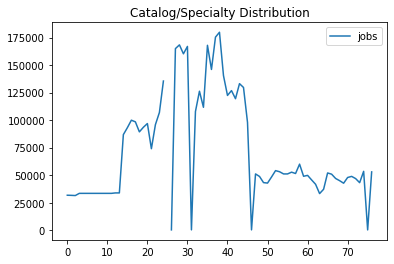

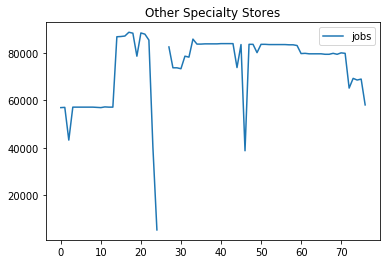

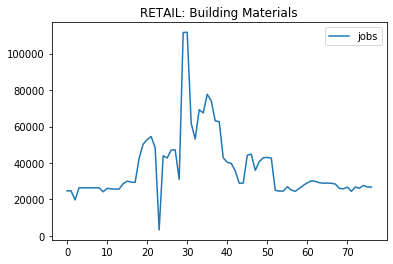

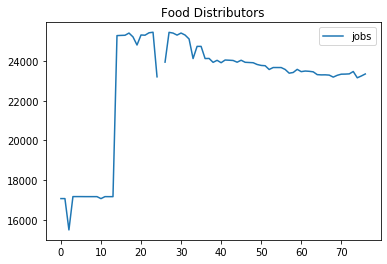

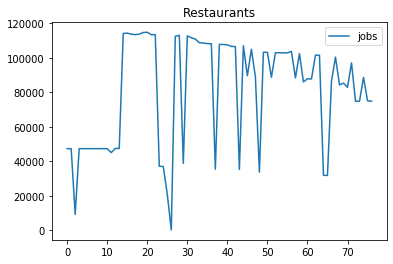

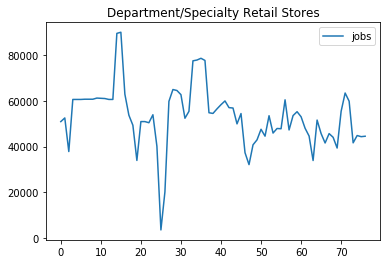

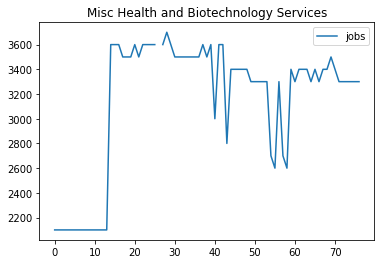

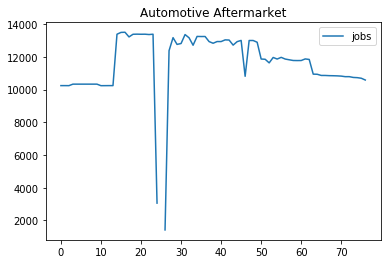

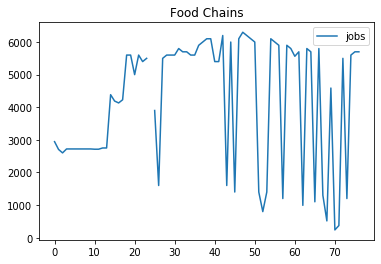

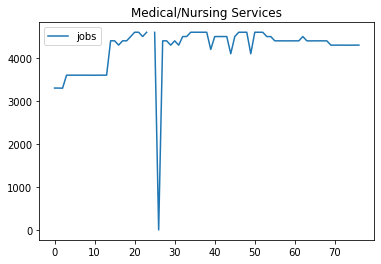

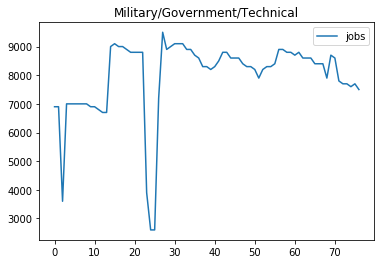

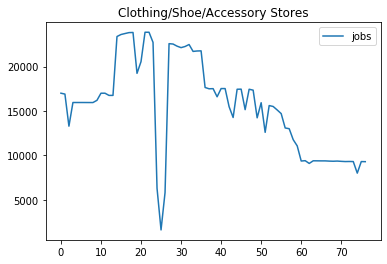

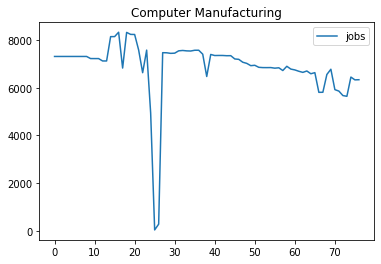

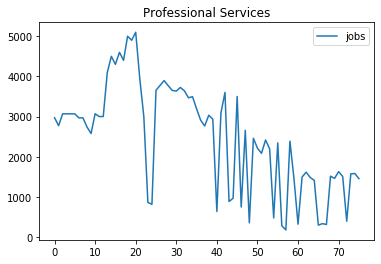

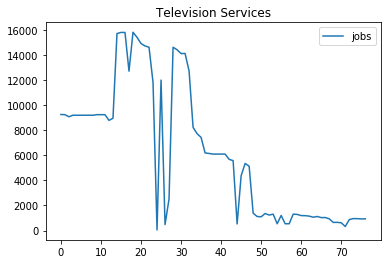

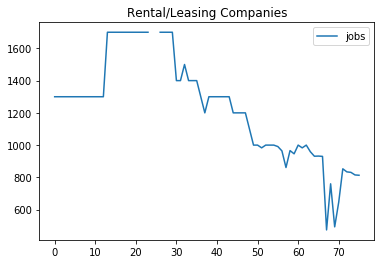

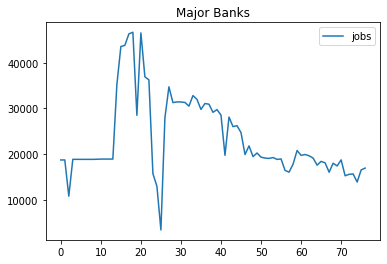

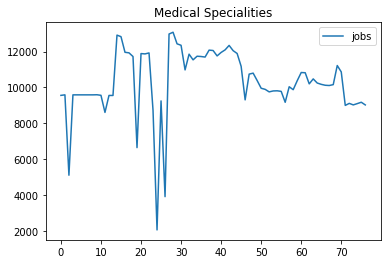

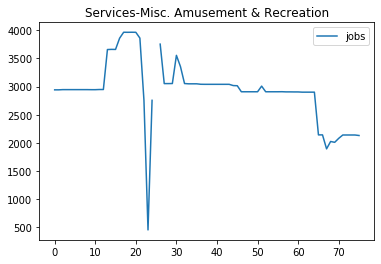

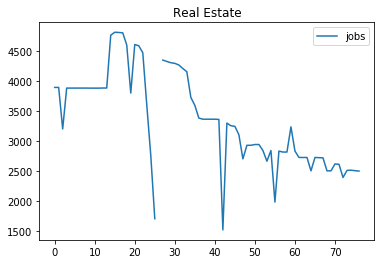

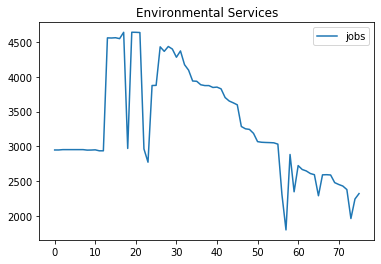

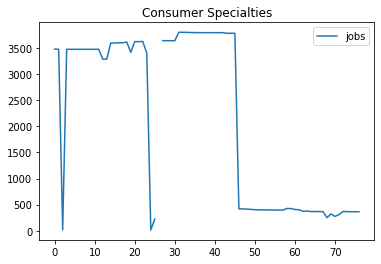

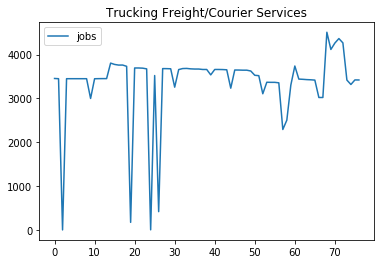

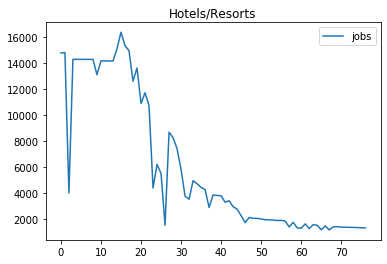

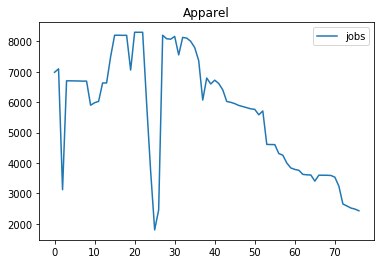

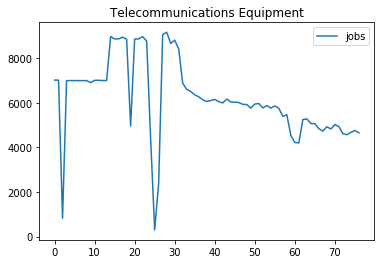

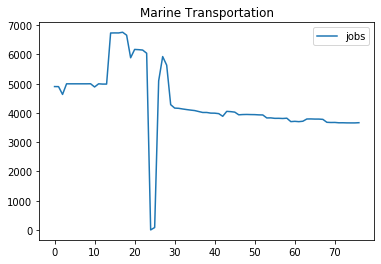

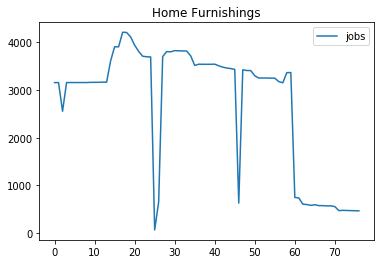

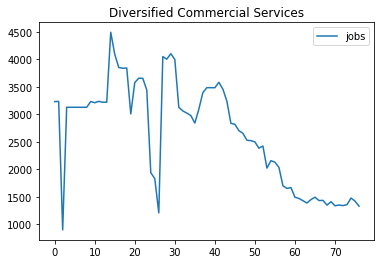

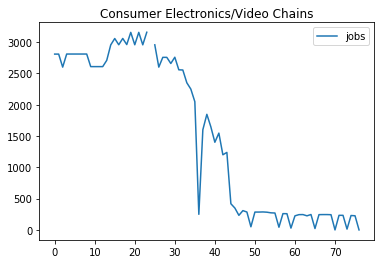

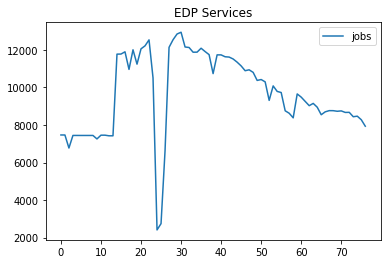

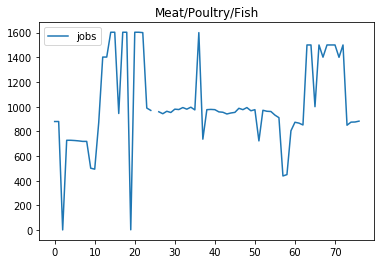

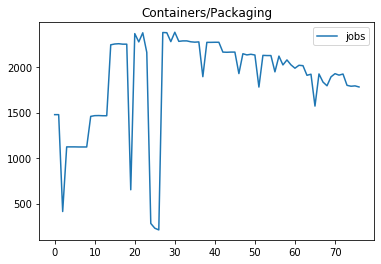

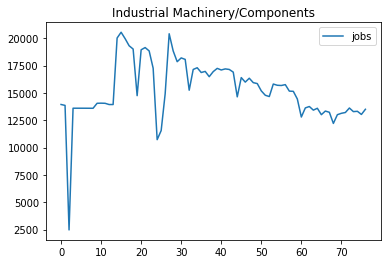

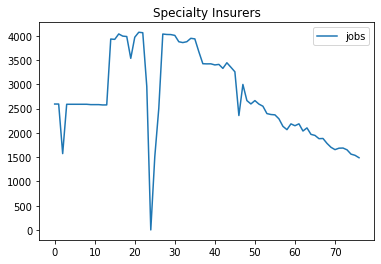

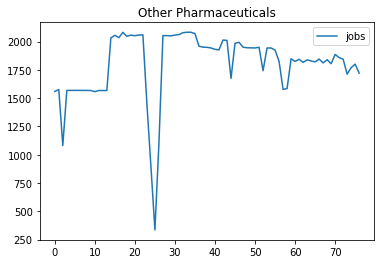

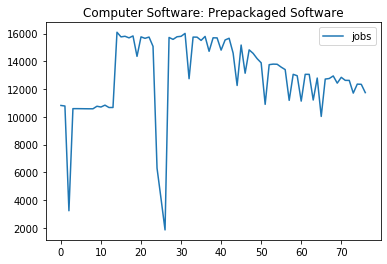

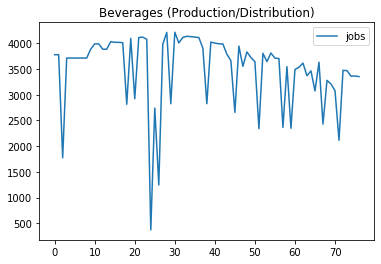

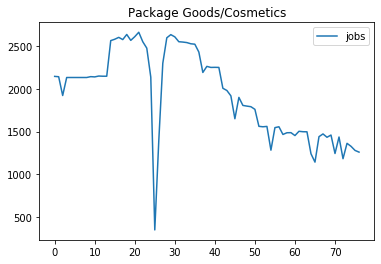

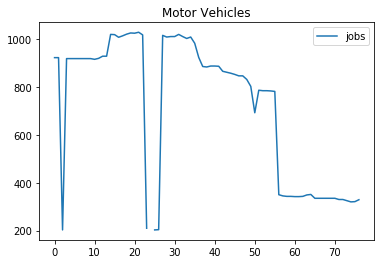

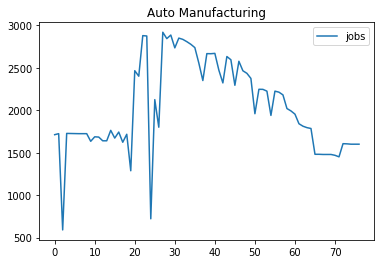

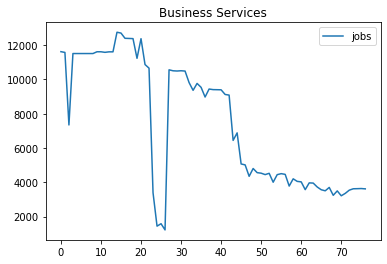

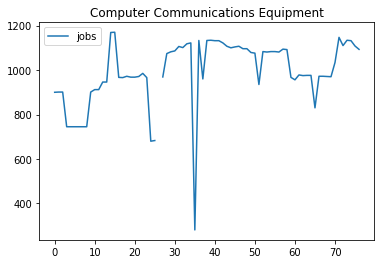

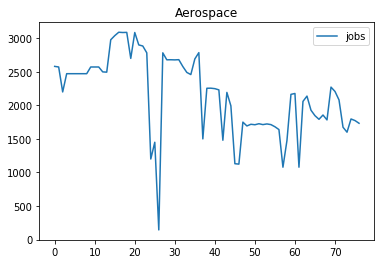

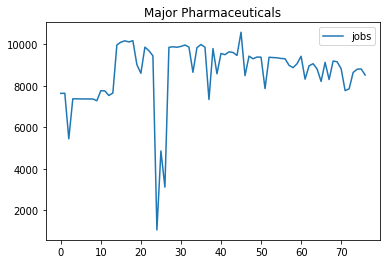

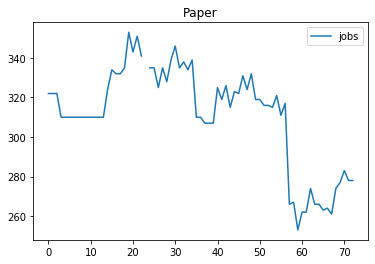

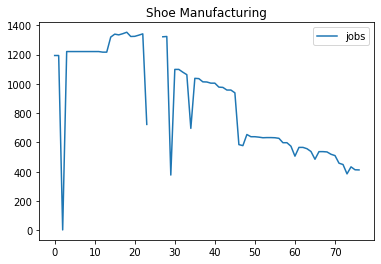

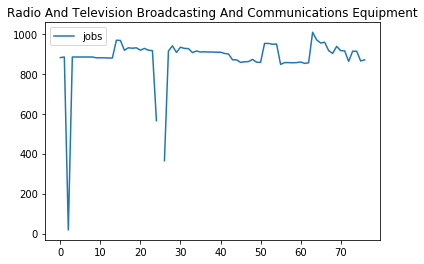

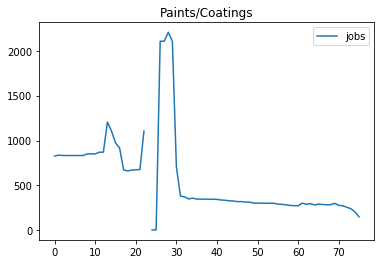

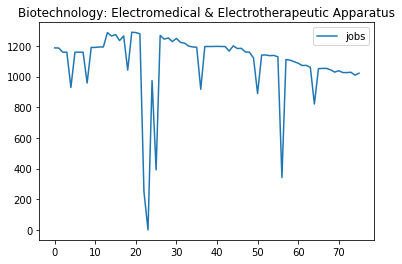

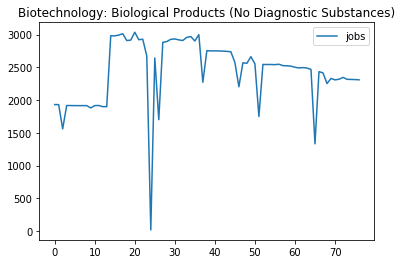

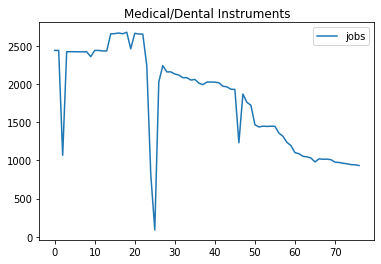

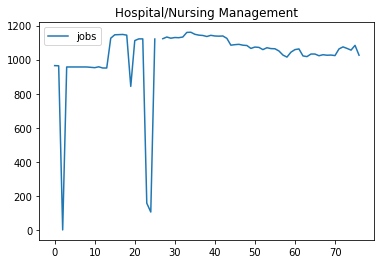

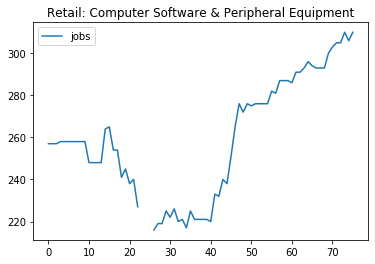

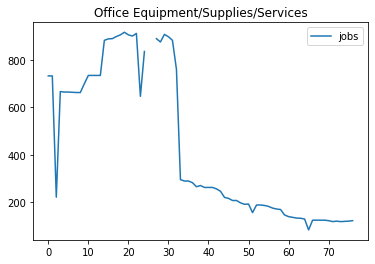

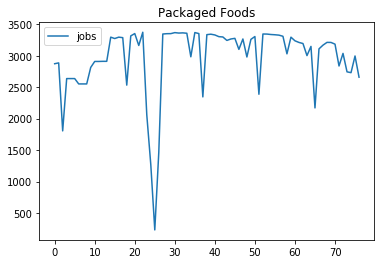

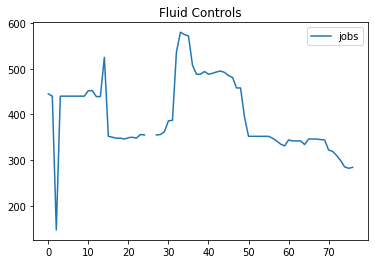

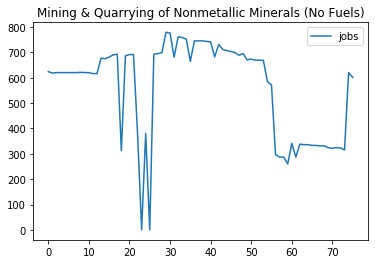

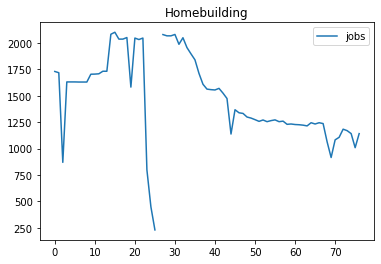

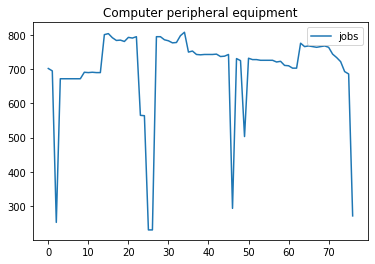

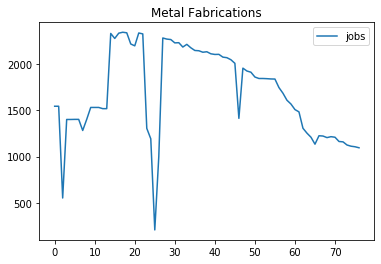

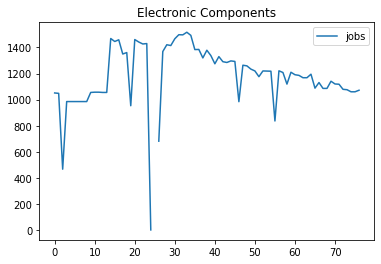

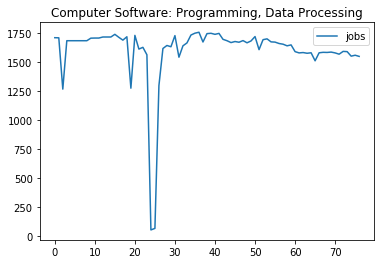

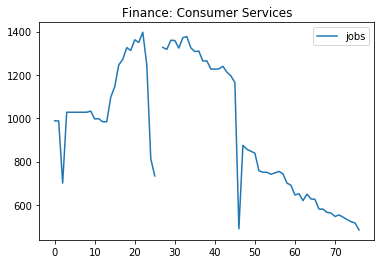

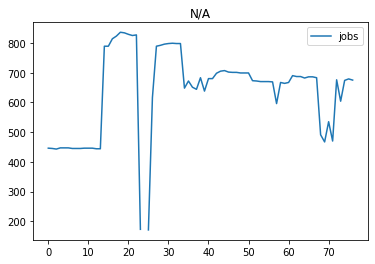

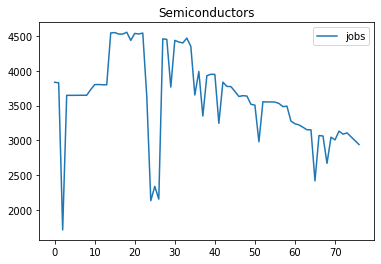

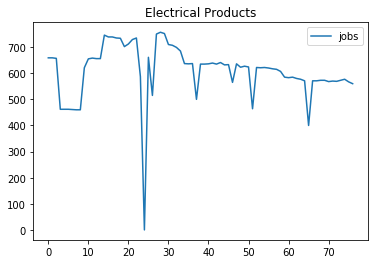

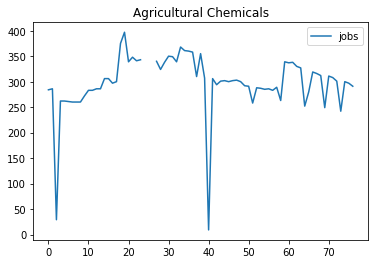

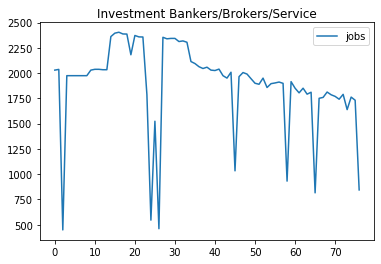

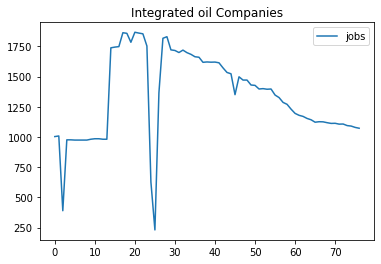

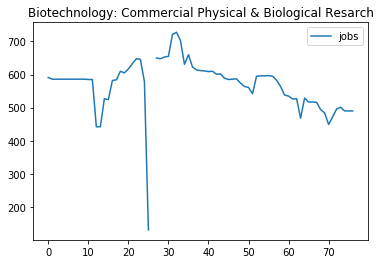

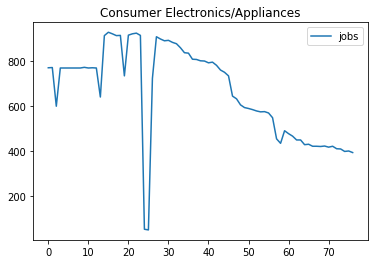

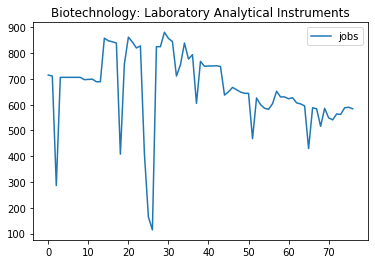

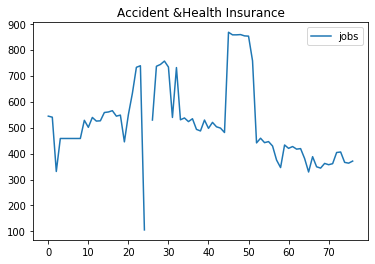

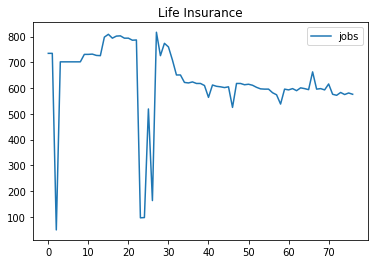

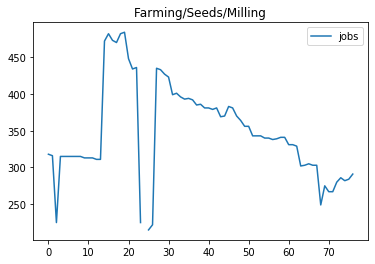

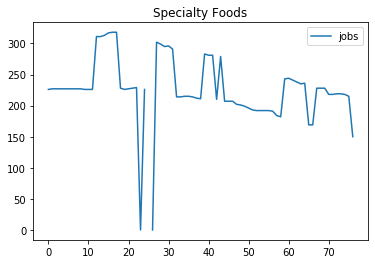

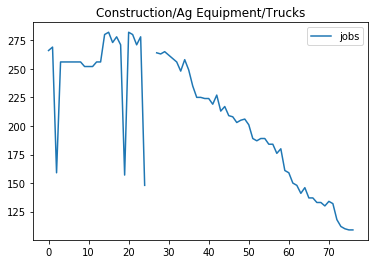

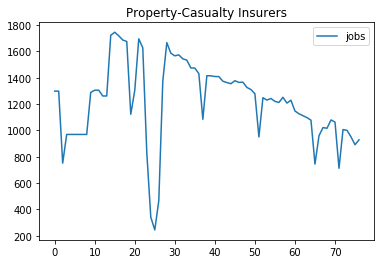

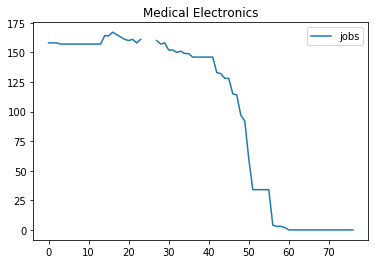

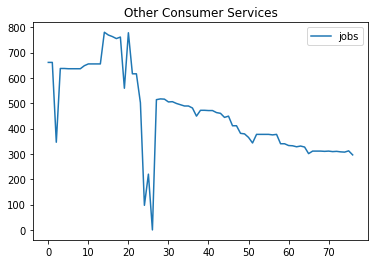

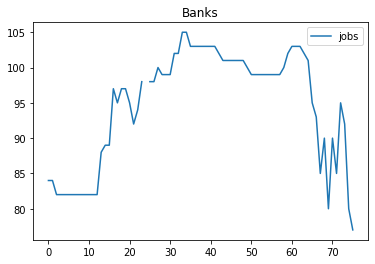

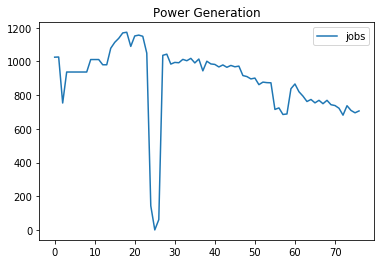

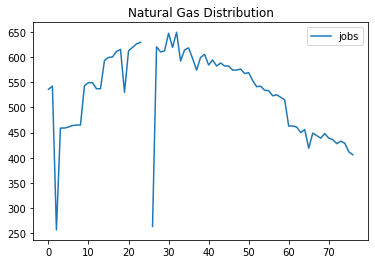

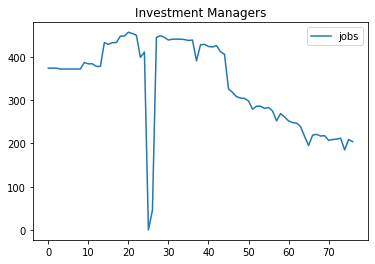

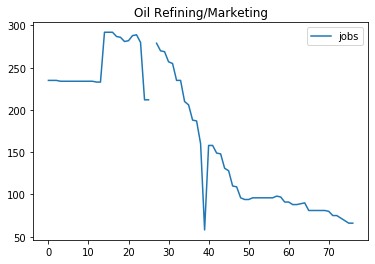

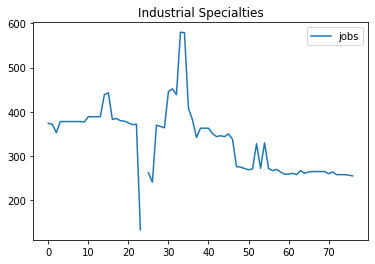

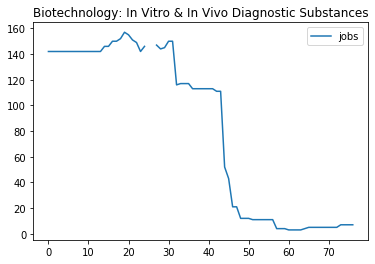

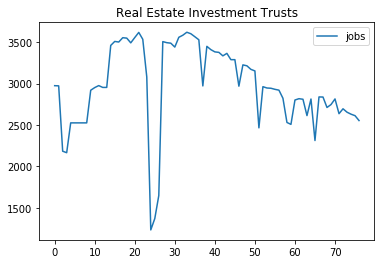

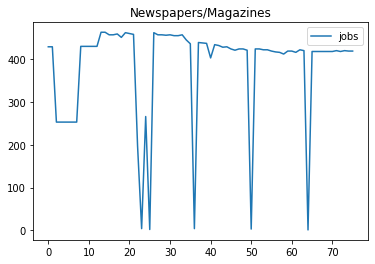

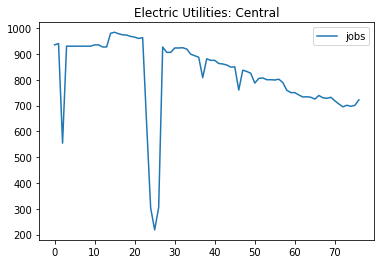

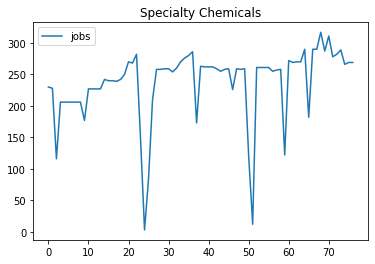

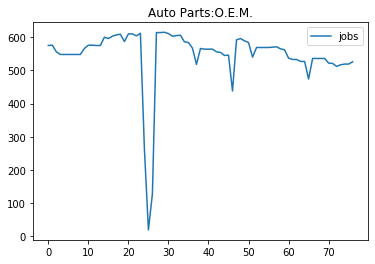

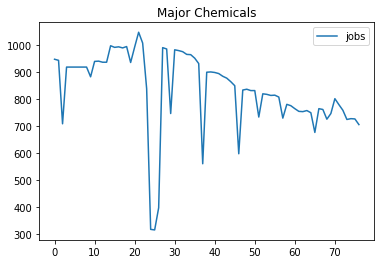

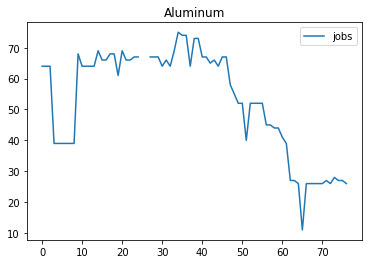

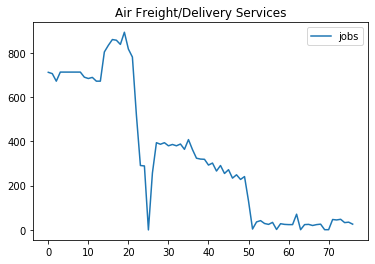

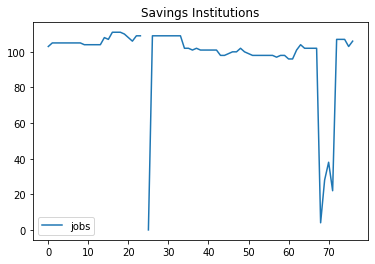

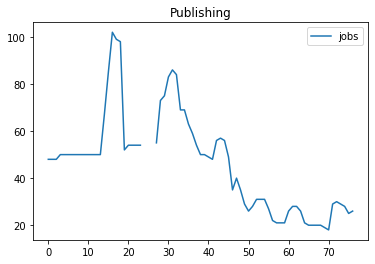

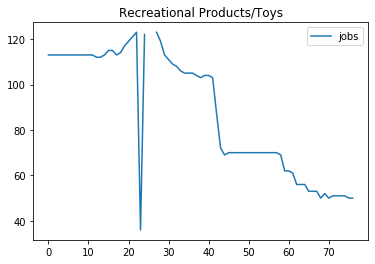

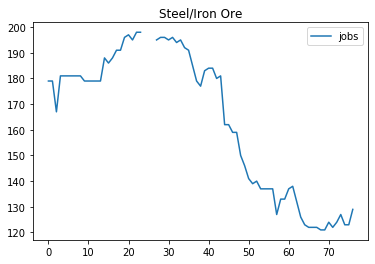

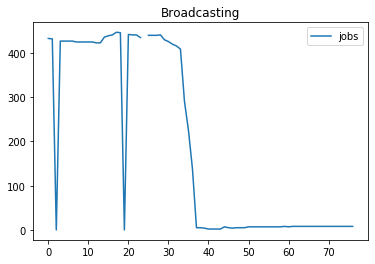

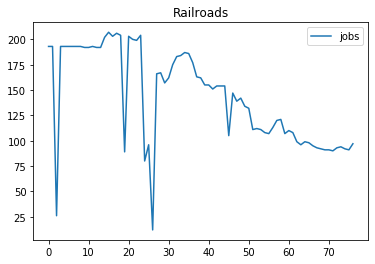

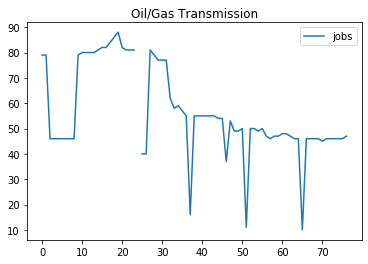

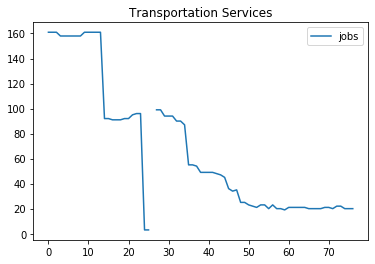

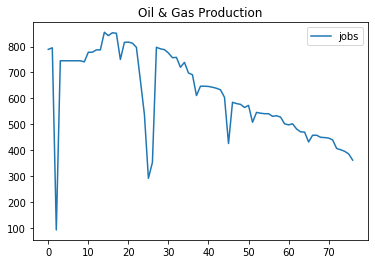

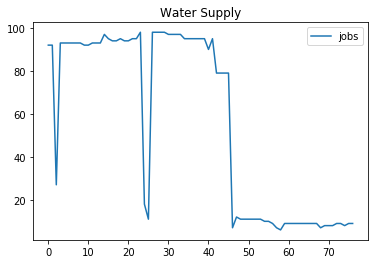

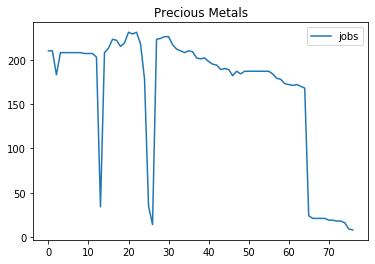

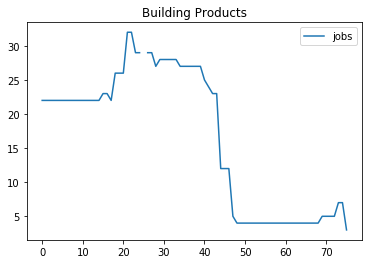

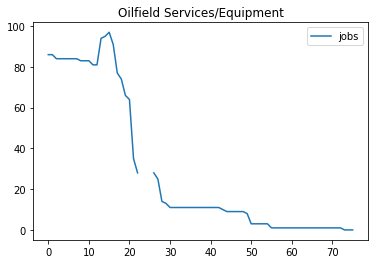

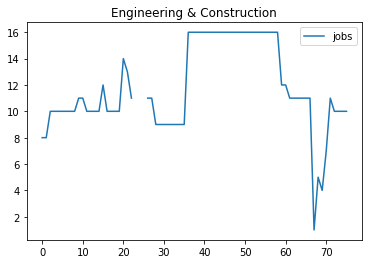

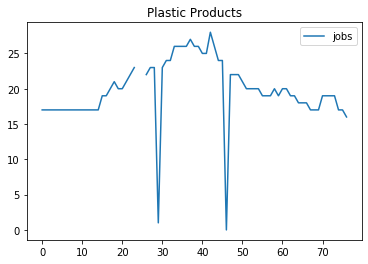

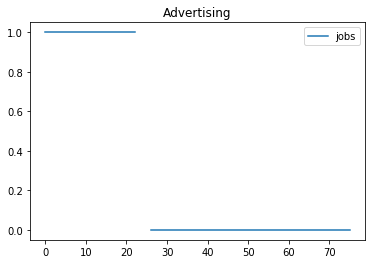

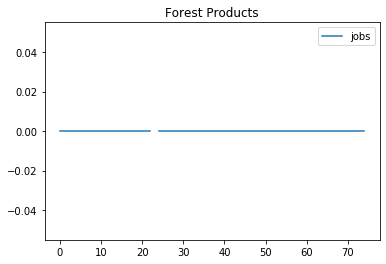

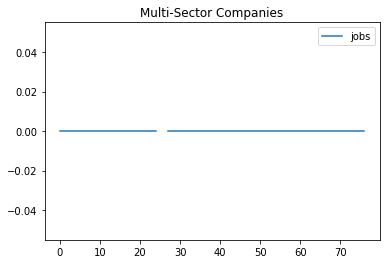

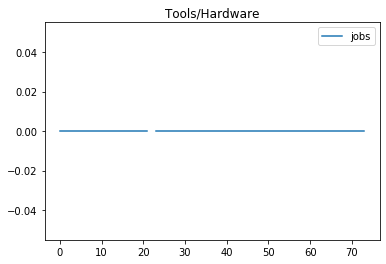

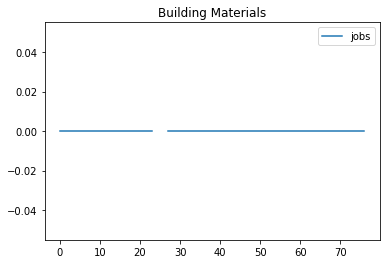

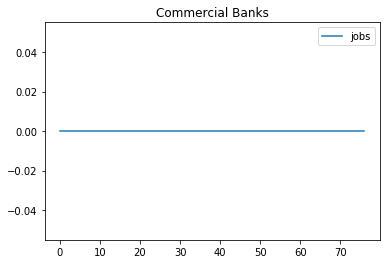

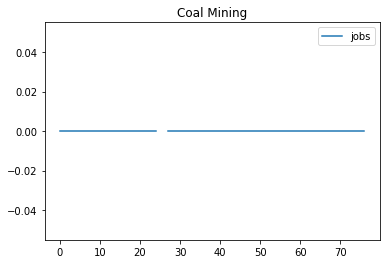

In [37]:
for industry in industries:
    try:
        cur.execute(query_industry.format(industry))
        rows = cur.fetchall()
        df = pd.DataFrame(rows, columns=['jobs','Date', 'Industry'])
        title = df['Industry'].tolist()[0]
        df.plot(title=title)
    except:
        pass